In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Dataset2_2023.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,State,District,Date,Rainfall,Flood,Latitude,Longitude,Elevation (m)_x,...,Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m)_y,Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,0,2744,Bihar,Patna,04-01-2023,0.0,0,34.7,72.1,1608,...,31.322464,4975.408061,2.110030,5727.146513,Desert,Peat,1407.616322,0,1,0
1,1,2744,Bihar,Patna,04-01-2023,0.0,0,36.6,75.2,1023,...,67.329905,250.663334,3.292511,2316.118042,Urban,Clay,7558.937831,0,1,1
2,2,2744,Bihar,Patna,04-01-2023,0.0,0,36.4,96.8,2615,...,66.867524,1662.912233,0.430302,4420.732681,Water Body,Silt,824.925695,0,1,1
3,3,2744,Bihar,Patna,04-01-2023,0.0,0,14.1,81.8,2253,...,43.634105,3243.247793,5.420973,1894.934438,Urban,Silt,7758.508301,1,0,0
4,4,2744,Bihar,Patna,04-01-2023,0.0,0,14.1,81.8,2253,...,30.614337,645.553033,9.887126,115.861789,Agricultural,Peat,8130.789607,0,1,1


In [5]:
df[['Elevation (m)_x','Elevation (m)_y']]

,Elevation (m)_x,Elevation (m)_y
0,1608,5727.146513
1,1023,2316.118042
2,2615,4420.732681
3,2253,1894.934438
4,2253,115.861789
...,...,...
113001,803,3349.221974
113002,2335,2019.358388
113003,1401,3925.543459
113004,2586,2453.370359


In [6]:
import matplotlib.pyplot as plt

In [7]:
strX = "Water Level (m)"

In [9]:
x = df[strX]
y = df['Flood']

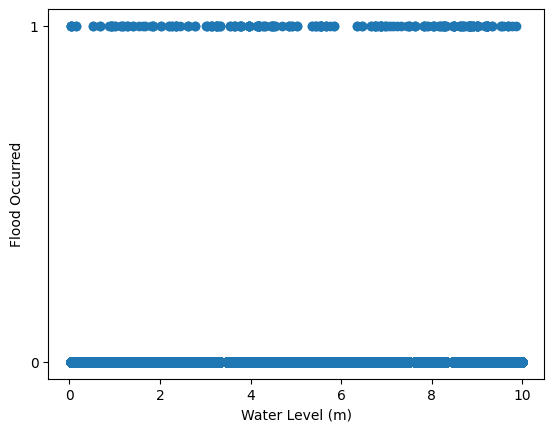

In [10]:
plt.scatter(x,y)
plt.xlabel(strX)
plt.ylabel('Flood Occurred')
plt.yticks([0,1])
plt.show()

In [11]:
len(df)

113006

In [12]:
len(df[df['Flood']==1])

250

In [8]:
temp = df[(((df['River Discharge (m³/s)']>=1000) | (df['Flood']!=1)) & ((df['Water Level (m)']>=2) | (df['Flood']!=1)))]

In [9]:
temp = temp[(((temp['River Discharge (m³/s)']<4000) | (temp['Flood']!=0)) & ((temp['Water Level (m)']<8) | (temp['Flood']!=0)))]

In [10]:
strX = "Water Level (m)"
x = temp[strX]
y = temp['Flood']

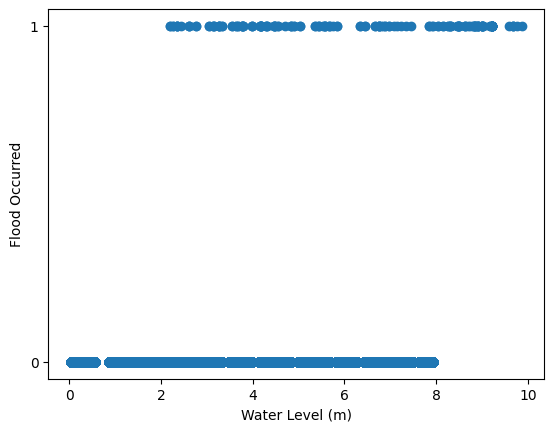

In [43]:
plt.scatter(x,y)
plt.xlabel(strX)
plt.ylabel('Flood Occurred')
plt.yticks([0,1])
plt.show()

In [17]:
len(temp)

64055

In [11]:
df2 = pd.DataFrame(x for x in df if x not in temp)

In [12]:
len(df2)

0

In [13]:
X = temp[['Rainfall','River Discharge (m³/s)','Water Level (m)']]
y = temp['Flood']

# <hr><hr>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Upsampling (Over-sampling) SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=100,
                            criterion='entropy',
                            min_samples_split=10,
                            max_depth=14,
                            random_state=42,
                            class_weight='balanced_subsample'
)

In [20]:
y_test[y_test==0].count()

15974

In [21]:
rf.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=14, min_samples_split=10, random_state=42)

In [22]:
X_resampled_test, y_resampled_test = smote.fit_resample(X_test, y_test)

In [23]:
y_pred = rf.predict(X_resampled_test)

In [24]:
rf.score(X_resampled_test,y_resampled_test)

0.8716977588581445

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
accuracy_score(y_resampled_test,y_pred)

0.8716977588581445

In [27]:
print(classification_report(y_resampled_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15974
           1       0.90      0.84      0.87     15974

    accuracy                           0.87     31948
   macro avg       0.87      0.87      0.87     31948
weighted avg       0.87      0.87      0.87     31948



In [28]:
rf.feature_names_in_

array(['Rainfall', 'River Discharge (m³/s)', 'Water Level (m)'],
      dtype=object)

In [29]:
rf.feature_importances_

array([0.23129175, 0.43997144, 0.32873681])

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
# Calculate ROC-AUC score for better evaluation of imbalanced classification
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probability for the minority class (Flood==1)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9048727619882307


In [32]:
from sklearn.metrics import roc_curve

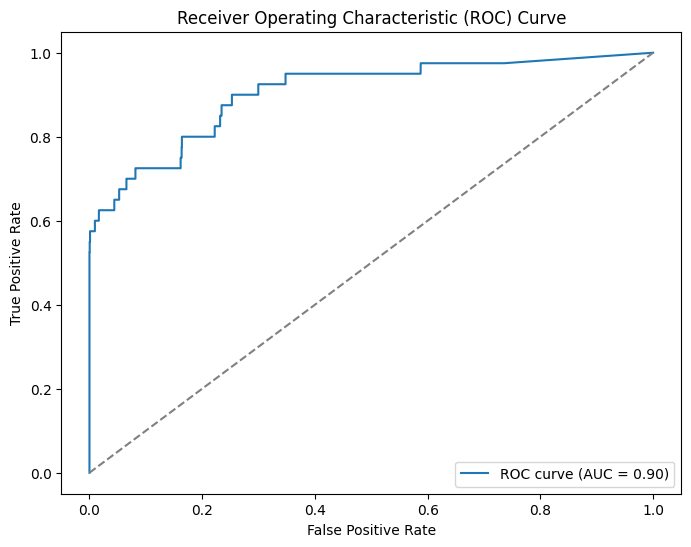

In [33]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Downsampling (Under-sampling)

In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled2, y_resampled2 = rus.fit_resample(X_train, y_train)

In [41]:
y_resampled2[y_resampled2==1].count()

130

In [42]:
rf2 = rf

In [43]:
rf2.fit(X_resampled2,y_resampled2)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=14, min_samples_split=10, random_state=42)

In [44]:
X_resampled_test2, y_resampled_test2 = smote.fit_resample(X_test, y_test)

In [45]:
y_pred2 = rf2.predict(X_resampled_test2)

In [46]:
rf2.score(X_resampled_test2,y_resampled_test2)

0.7974521096782271

In [47]:
accuracy_score(y_resampled_test2,y_pred2)

0.7974521096782271

In [48]:
print(classification_report(y_resampled_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     15974
           1       0.81      0.78      0.79     15974

    accuracy                           0.80     31948
   macro avg       0.80      0.80      0.80     31948
weighted avg       0.80      0.80      0.80     31948



In [49]:
rf2.feature_importances_

array([0.2613697 , 0.35593962, 0.38269068])

In [50]:
y_pred3 = rf.predict(X_resampled_test2)

In [51]:
print(classification_report(y_resampled_test2,y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     15974
           1       0.81      0.78      0.79     15974

    accuracy                           0.80     31948
   macro avg       0.80      0.80      0.80     31948
weighted avg       0.80      0.80      0.80     31948



# AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
abc = AdaBoostClassifier(n_estimators=1000,random_state=42,learning_rate=0.5)

In [70]:
abc.fit(X_resampled,y_resampled)

AdaBoostClassifier(learning_rate=0.5, n_estimators=1000, random_state=42)

In [67]:
y_pred_abc = abc.predict(X_resampled_test)

In [68]:
abc.score(X_resampled_test,y_resampled_test)

0.8295980969074747

In [59]:
accuracy_score(y_resampled_test,y_pred_abc)

0.8450294228120696

In [60]:
print(classification_report(y_resampled_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     15974
           1       0.85      0.84      0.84     15974

    accuracy                           0.85     31948
   macro avg       0.85      0.85      0.85     31948
weighted avg       0.85      0.85      0.85     31948



In [61]:
abc.feature_names_in_

array(['Rainfall', 'River Discharge (m³/s)', 'Water Level (m)'],
      dtype=object)

In [62]:
abc.feature_importances_

array([0.17960843, 0.46082363, 0.35956794])